Improtación de librerias y carga de modelo YOLO

In [66]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"  # @param ["tensorflow", "jax", "torch"]

from tensorflow import data as tf_data
import tensorflow_datasets as tfds
import keras
import keras_cv
import numpy as np
from keras_cv import bounding_box
import os
from keras_cv import visualization
import tqdm

pretrained_model = keras_cv.models.YOLOV8Detector.from_preset(
    "yolo_v8_xs_backbone_coco", bounding_box_format="xywh", num_classes=80, load_weights=True
)

Cargamos imagen a procesar y ajustamos tamaño (debe ser múltiplo de 64)

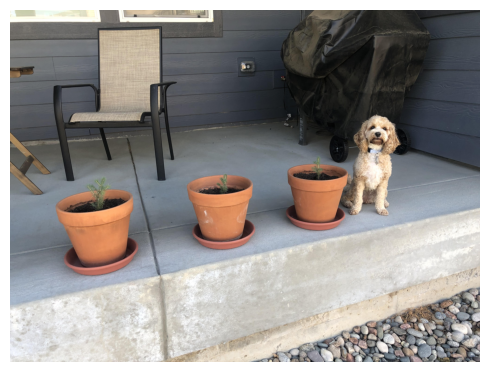

In [67]:
image = keras.utils.load_img("yolo_test.jpeg")

image = np.array(image)

visualization.plot_image_gallery(
    np.array([image]),
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)

inference_resizing = keras_cv.layers.Resizing(
    640, 640, pad_to_aspect_ratio=True, bounding_box_format="xywh"
)

image_batch = inference_resizing([image])

Clases de salida

In [68]:
class_ids = [
"person",
"bicycle",
"car",
"motorcycle",
"airplane",
"bus",
"train",
"truck",
"boat",
"traffic light",
"fire hydrant",
"stop sign",
"parking meter",
"bench",
"bird",
"cat",
"dog",
"horse",
"sheep",
"cow",
"elephant",
"bear",
"zebra",
"giraffe",
"backpack",
"umbrella",
"handbag",
"tie",
"suitcase",
"frisbee",
"skis",
"snowboard",
"sports ball",
"kite",
"baseball bat",
"baseball glove",
"skateboard",
"surfboard",
"tennis racket",
"bottle",
"wine glass",
"cup",
"fork",
"knife",
"spoon",
"bowl",
"banana",
"apple",
"sandwich",
"orange",
"broccoli",
"carrot",
"hot dog",
"pizza",
"donut",
"cake",
"chair",
"couch",
"potted plant",
"bed",
"dining table",
"toilet",
"tv",
"laptop",
"mouse",
"remote",
"keyboard",
"cell phone",
"microwave",
"oven",
"toaster",
"sink",
"refrigerator",
"book",
"clock",
"vase",
"scissors",
"teddy bear",
"hair drier",
"toothbrush",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

Predicción y visualización
Aplicando Non-max supression y decodificación a la salida de YOLO, non max supression y la decodificación son parte ahora propiedades y metodos del detector


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


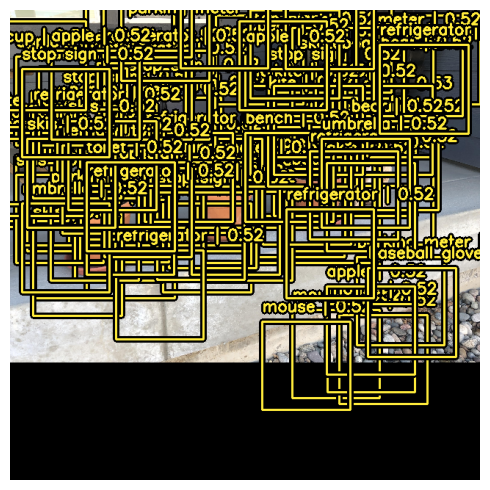

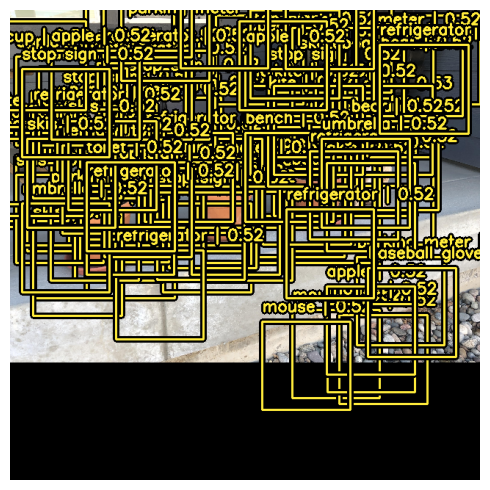

In [69]:
y_pred = pretrained_model.predict(image_batch)

visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=class_mapping,
)


Predicción y visualización, pero vamos a quitar la etapa de non-max supression, podemos hacer override al decodificador

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


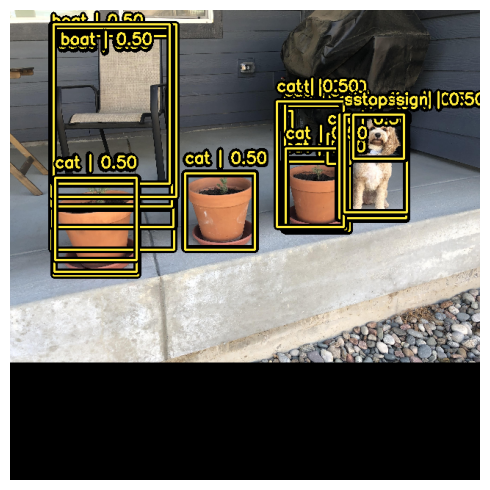

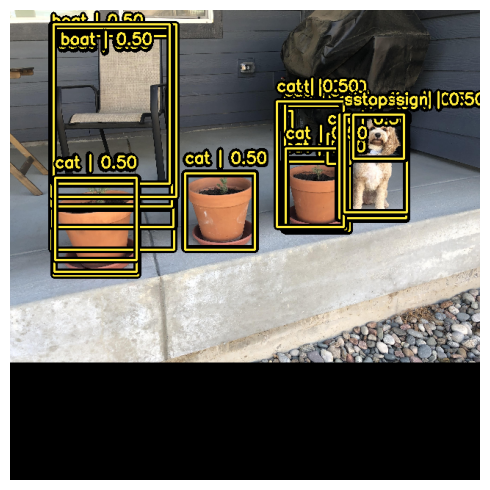

In [70]:
# The following NonMaxSuppression layer is equivalent to disabling the operation
prediction_decoder = keras_cv.layers.NonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    iou_threshold=1.0,
    confidence_threshold=0.0,
)

pretrained_model = keras_cv.models.YOLOV8Detector.from_preset(
    "yolo_v8_m_pascalvoc",
    bounding_box_format="xywh",
    prediction_decoder=prediction_decoder,
)

y_pred = pretrained_model.predict(image_batch)
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=class_mapping,
)



Ahora hacemos una predicción con valores personalizados de non-max supression

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


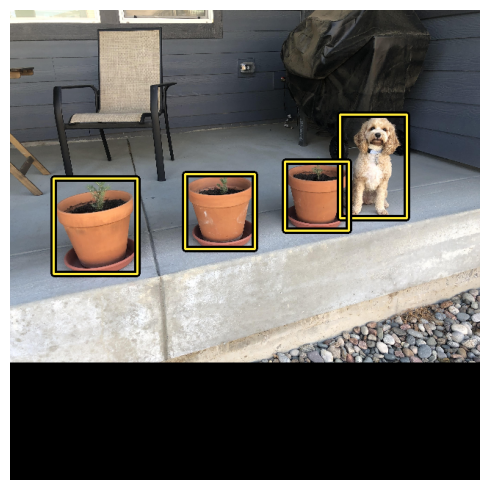

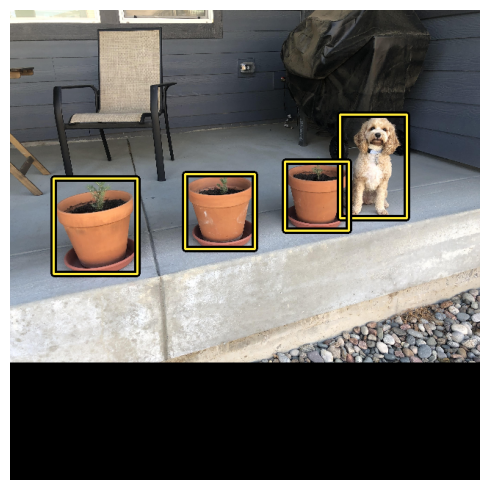

In [71]:
prediction_decoder = keras_cv.layers.NonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    # Decrease the required threshold to make predictions get pruned out
    iou_threshold=0.2,
    # Tune confidence threshold for predictions to pass NMS
    confidence_threshold=0.7,
)
pretrained_model = keras_cv.models.YOLOV8Detector.from_preset(
    "yolo_v8_m_pascalvoc",
    bounding_box_format="xywh",
    prediction_decoder=prediction_decoder,
)

y_pred = pretrained_model.predict(image_batch)
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
)